<a href="https://www.kaggle.com/code/jonasaacampos/imagens-m-dicas-e-sinais-biol-gicos?scriptVersionId=145471174" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Imagens Médicas e Sinais Biológicos: Cenários baseados em imagens digitais em saúde

[//]: # (Title: Imagens Médicas e Sinais Biológicos: Cenários baseados em imagens digitais em saúde)
[//]: # (Author: Jonas Campos)
[//]: # (Date: April 20, 2021)
[//]: # (Comment: Imagens Médicas e Sinais Biológicos, Especialização em Informática da Saúde) 
[//]: # (Tags: #python, #pydicom, #dicom, #imagensmedicas)  

<!-- PROJECT SHIELDS | ![image](BadgeURLHere) -->
<p align='center'>
  <!-- Python -->
  <img src='https://img.shields.io/badge/Python-14354C?style=for-the-badge&logo=python&logoColor=white'/>
  <!-- Jupyter -->
  <img src='https://img.shields.io/badge/Jupyter-F37626.svg?&style=for-the-badge&logo=Jupyter&logoColor=white'/>
</p>
  <p align='center'>
  <!-- Unifesp logo -->
  <img src='https://www.unifesp.br/reitoria/dci/images/docs/manual_da_marca/Unifesp_completa_policromia_RGB.png' alt="unifesp" width="200" height="200" />
  </p> 

<!-- PROJECT LOGO -->
![](https://www.visualmedica.com/wp-content/uploads/2019/04/Dicom-Logo-1024x394.png)
    

  <h3 align="center">Utilização de uma ferramenta para visualização de imagens médicas (Tema A)</h3>

  <p align="center">Imagens Médicas e Sinais Biológicos, Especialização em Informática da Saúde</p>

------

## Utilização de uma ferramenta para visualização de imagens médicas (Tema A)

**O que veremos neste artigo:**

- [ ] Obter dados e armazená-los para análise posterior
- [ ] Visualizar imagens dicom utilizando a linguagem Python, em um jupyter notebook, que dispensa a instalação e roda em qualquer navegador.
- [ ] Obter e organizar metadados das imagens em um data frame
- [ ] Analisar as imagens



### Sobre o conjunto de dados

Para este estudo foram utilizados exames de Adenocarcinoma pulmonar, disponibilizados publicamente no *The Cancer Imaging Archive (TCIA).* Este conjunto de dados de imagem são heterogêneos em termos de modalidades de scanner, fabricantes e protocolos de aquisição. Na maioria dos casos, as imagens foram adquiridas como parte dos cuidados de rotina e não como parte de um estudo de pesquisa controlado ou ensaio clínico (Albertina, Watson, Holback, et al, 2016).

As imagens utilizadas neste estudo são as de peito (chest) e pulmão (lung).

------
Para baixar o conjunto de dados completo, [clique aqui.](https://wiki.cancerimagingarchive.net/display/Public/TCGA-LUAD)

In [1]:
#importando bibliotecas necessárias
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns
%matplotlib inline

import pydicom
import os
import warnings

In [2]:
#caminho onde estão armazenadas nossas imagens
imagens_dir = '../input/siim-medical-images/dicom_dir'
#le todos os arquivos e insere em uma lista
imagens_list = os.listdir(imagens_dir)

print(f'Foram encontrados {len(imagens_list)} imagens dicom neste diretório.',
      f'\nExemplo dos arquivos encontrados:\n{imagens_list[0:5]}')


Foram encontrados 100 imagens dicom neste diretório. 
Exemplo dos arquivos encontrados:
['ID_0015_AGE_0061_CONTRAST_1_CT.dcm', 'ID_0019_AGE_0070_CONTRAST_1_CT.dcm', 'ID_0063_AGE_0073_CONTRAST_0_CT.dcm', 'ID_0077_AGE_0074_CONTRAST_0_CT.dcm', 'ID_0073_AGE_0074_CONTRAST_0_CT.dcm']


In [3]:
def CarregaDadosDataFrame():
    
    '''
    Carrega um dataframe Pandas com as imagens para o treinamento do modelo
    '''
    
    #caminho onde estão armazenadas nossas imagens
    imagens_dir = '../input/siim-medical-images/dicom_dir'
    #le todos os arquivos e insere em uma lista
    imagens_list = os.listdir(imagens_dir)
    imagens_quant = (len(imagens_list))
    
    dados = {
        #"LOCAL": [],
        "ARQUIVO": [],
        "ID": [],
        "IDADE": [],
        "CONTRASTE":[],
        "FAIXA_ETARIA":[],
    }
    
    for arquivo in range(imagens_quant):
        #dados['LOCAL'].append(f'{imagens_dir}')
        dados['ARQUIVO'].append(f'{imagens_list}{arquivo}')
        dados['ID'].append(imagens_list[arquivo][3:7])
        dados['IDADE'].append(int(imagens_list[arquivo][14:16]))
        
        if dados['IDADE'][arquivo] < 40:
            dados['FAIXA_ETARIA'].append('menos de 40')
        elif dados['IDADE'][arquivo] >= 40 and dados['IDADE'][arquivo] < 60:
            dados['FAIXA_ETARIA'].append('40-59')
        elif dados['IDADE'][arquivo] >= 60 and dados['IDADE'][arquivo] < 80:
            dados['FAIXA_ETARIA'].append('59-79')
        else:
            dados['FAIXA_ETARIA'].append('mais de 80')
        
        dados['CONTRASTE'].append(int(imagens_list[arquivo][26]))
        
    print(f'Os dados estão armazenados no diretório\n{imagens_dir}\n que contém {imagens_quant} exames')
        
    dados = pd.DataFrame(data=dados)
    return dados

In [4]:
dados =  CarregaDadosDataFrame()


Os dados estão armazenados no diretório
../input/siim-medical-images/dicom_dir
 que contém 100 exames


In [5]:
dados.head()

,ARQUIVO,ID,IDADE,CONTRASTE,FAIXA_ETARIA
0,"['ID_0015_AGE_0061_CONTRAST_1_CT.dcm', 'ID_001...",0015,61,1,59-79
1,"['ID_0015_AGE_0061_CONTRAST_1_CT.dcm', 'ID_001...",0019,70,1,59-79
2,"['ID_0015_AGE_0061_CONTRAST_1_CT.dcm', 'ID_001...",0063,73,0,59-79
3,"['ID_0015_AGE_0061_CONTRAST_1_CT.dcm', 'ID_001...",0077,74,0,59-79
4,"['ID_0015_AGE_0061_CONTRAST_1_CT.dcm', 'ID_001...",0073,74,0,59-79


In [6]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   ARQUIVO       100 non-null    object
 1   ID            100 non-null    object
 2   IDADE         100 non-null    int64 
 3   CONTRASTE     100 non-null    int64 
 4   FAIXA_ETARIA  100 non-null    object
dtypes: int64(2), object(3)
memory usage: 4.0+ KB


/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


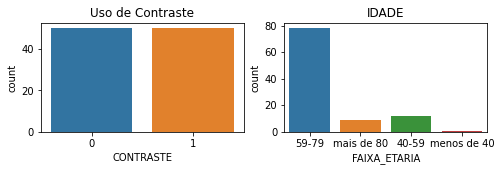

In [7]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize = (8, 2))
s1 = sns.countplot(dados['CONTRASTE'], ax=ax1)
s1.set_title("Uso de Contraste")
s2 = sns.countplot(dados['FAIXA_ETARIA'], ax=ax2)
s2.set_title("IDADE")
plt.show()


In [8]:
dados['FAIXA_ETARIA'].describe()

count       100
unique        4
top       59-79
freq         78
Name: FAIXA_ETARIA, dtype: object

In [9]:
dados['IDADE'].describe()

count    100.000000
mean      67.480000
std        9.274141
min       39.000000
25%       61.000000
50%       70.000000
75%       74.000000
max       83.000000
Name: IDADE, dtype: float64

**salvando relatório**

Pdemos enviar estes dados tabulados para análises de custos, BI entre outros setores administrativos.

In [10]:
#salva este relatório em csv para análise posterior/compartilhamento com outras equipes
dados.to_csv('exames_dicom.csv')

### Imagens em formato DICOM

O padrão *Digital Imaging and Communications in Medicine* (DICOM) facilita a interoperabilidade de equipamentos de imagens médicas, especificando: protocolos de rede e de armazenamento (MITA 2021).

### Visualizando arquivos DICOM e extraindo metadados

Pydicom é um pacote Python puro para trabalhar com arquivos DICOM, como imagens médicas, relatórios e objetos de radioterapia. Este pacote manipula, visualiza e grava arquivos DICOM (Pydicom, 2021).


Local do arquivo........: ../input/siim-medical-images/dicom_dir
SOP Class........: 1.2.840.10008.5.1.4.1.1.2 (CT Image Storage)

Patient's Name...: TCGA-17-Z043, 
Patient ID.......: TCGA-17-Z043
Modality.........: CT
Study Date.......: 19840713
Image size.......: 512 x 512
Pixel Spacing....: [006.562500e-01, 006.562500e-01]
Slice location...: -155


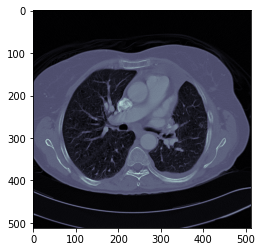

In [11]:
# Full path of the DICOM file is passed in base
imagens_dir = '../input/siim-medical-images/dicom_dir'
imagens_list = os.listdir(imagens_dir)

arquivo = pydicom.data.data_manager.get_files(imagens_dir, imagens_list[0])[0]
  
metadados = pydicom.dcmread(arquivo)

# Metadados da imagem:
print()
print(f"Local do arquivo........: {imagens_dir}")
print(f"SOP Class........: {metadados.SOPClassUID} ({metadados.SOPClassUID.name})")
print()

pat_name = metadados.PatientName
display_name = pat_name.family_name + ", " + pat_name.given_name
print(f"Patient's Name...: {display_name}")
print(f"Patient ID.......: {metadados.PatientID}")
print(f"Modality.........: {metadados.Modality}")
print(f"Study Date.......: {metadados.StudyDate}")
print(f"Image size.......: {metadados.Rows} x {metadados.Columns}")
print(f"Pixel Spacing....: {metadados.PixelSpacing}")

# use .get() if not sure the item exists, and want a default value if missing
print(f"Slice location...: {metadados.get('SliceLocation', '(missing)')}")

plt.imshow(metadados.pixel_array, cmap=plt.cm.bone)  # set the color map to bone
plt.show()

A pydicom possui diversas ferramentas para lidarmos com imagens dicom. Ao invés de filtrar e mostrar apenas alguns metadados, podemos usar o *.dcmread* isoladamente, que teremos todos os metadados da imagem em questão.
Abaixo temos todos os metadadosd deste exame. Uma lista completa e documentada de todos os parâmetros podem,os encontrar em [Innolitics(2021)](https://dicom.innolitics.com/ciods)

In [12]:
metadados_full = pydicom.dcmread(arquivo)
metadados_full

Dataset.file_meta -------------------------------
(0002, 0000) File Meta Information Group Length  UL: 194
(0002, 0001) File Meta Information Version       OB: b'\x00\x01'
(0002, 0002) Media Storage SOP Class UID         UI: CT Image Storage
(0002, 0003) Media Storage SOP Instance UID      UI: 1.3.6.1.4.1.14519.5.2.1.7777.9002.612696157451530634003461974920
(0002, 0010) Transfer Syntax UID                 UI: Implicit VR Little Endian
(0002, 0012) Implementation Class UID            UI: 1.2.40.0.13.1.1.1
(0002, 0013) Implementation Version Name         SH: 'dcm4che-1.4.31'
-------------------------------------------------
(0008, 0000) Group Length                        UL: 458
(0008, 0005) Specific Character Set              CS: 'ISO_IR 100'
(0008, 0008) Image Type                          CS: ['ORIGINAL', 'PRIMARY', 'AXIAL', 'CT_SOM5 SPI']
(0008, 0016) SOP Class UID                       UI: CT Image Storage
(0008, 0018) SOP Instance UID                    UI: 1.3.6.1.4.1.14519.5.2.1

In [13]:
# Full path of the DICOM file is passed in base
def ImageToDataFrame():
    
    imagens_dir = '../input/siim-medical-images/dicom_dir'
    imagens_list = os.listdir(imagens_dir)
    imagens_quant = len(imagens_list)
    
    print(f'foram encontradas {imagens_quant} imagens.')
    
    dados = {
        "PatientID": [],
        "PatientSex": [],
        "PatientAge": [],
        "BodyPartExamined": [],        
        "DistanceSource_mm":[],
        "PixelData":[],
        
    }
    
    for img in range(imagens_quant):
              
        arquivo = pydicom.data.data_manager.get_files(imagens_dir, imagens_list[img])[0]
        metadados = pydicom.dcmread(arquivo)

        # Metadados da imagem:
        dados['PatientID'].append(metadados.PatientID)
        dados['PatientSex'].append(metadados.PatientSex)
        dados['PatientAge'].append(metadados.PatientAge)
        dados['BodyPartExamined'].append(metadados.BodyPartExamined)
        dados['DistanceSource_mm'].append(metadados.DistanceSourceToPatient)
        dados['PixelData'].append(metadados.pixel_array) #.flatten()

    dados = pd.DataFrame(data=dados)
    return dados

  

In [14]:
exames = ImageToDataFrame()

foram encontradas 100 imagens.


In [15]:
exames.head()

,PatientID,PatientSex,PatientAge,BodyPartExamined,DistanceSource_mm,PixelData
0,TCGA-17-Z043,F,061Y,CHEST,570.0,"[[0, 44, 46, 26, 13, 28, 57, 23, 0, 31, 21, 0,..."
1,TCGA-17-Z053,M,070Y,CHEST,570.0,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,..."
2,TCGA-51-4079,F,073Y,LUNG,535.0,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,..."
3,TCGA-50-8460,M,074Y,LUNG,541.0,"[[-1024, -1024, -1024, -1024, -1024, -1024, -1..."
4,TCGA-60-2723,F,074Y,LUNG,541.0,"[[-2000, -2000, -2000, -2000, -2000, -2000, -2..."


In [16]:
def MostraExames(n):
    exame_sample = exames['PixelData'][n]
    plt.imshow(exame_sample, cmap=plt.cm.bone)  # set the color map to bone
    plt.show()

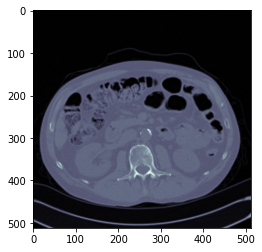

In [17]:
MostraExames(50)

### Qual a distância mais utilizada para realizar os exames?

Vamos analisar qual a distância entre o raio x e o paciente (atributo *DistanceSourceToPatient*)

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


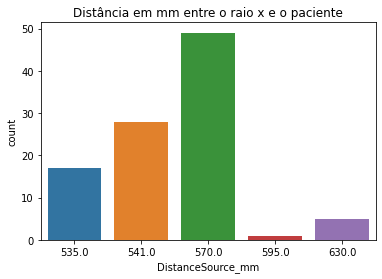

In [18]:
DistanceSource = sns.countplot(exames['DistanceSource_mm'])
DistanceSource.set_title("Distância em mm entre o raio x e o paciente")
plt.show()

### Refências
MITA - Medical Imaging Technology Association. **DICOM PS3.1 2021b - Introduction and Overview**. NEMA, DICOM Standards Committee (2021). Disponível [AQUI](http://dicom.nema.org/medical/dicom/current/output/html/part01.html#sect_1.1). Acessado em 25/04/2021.

Albertina, B., Watson, M., Holback, et al. Radiology Data from The Cancer Genome Atlas Lung Adenocarcinoma [TCGA-LUAD] collection. T**he Cancer Imaging Archive**. (2016). Disponível [AQUI](http://doi.org/10.7937/K9/TCIA.2016.JGNIHEP5). Acessado em 20/04/2021.

Innolitics. **DICOM Standard Browser**. (2021) Disponível [AQUI](https://dicom.innolitics.com/ciods). Acessado em 24/04/2021.

Pydicom. **Introduction to pydicom - Brief overview of pydicom.** (2021). Disponível [AQUI](https://pydicom.github.io/pydicom/stable/old/getting_started.html). Acessado em 23/04/2021.

## Contato

**Author:** Jonas Araujo de Avila Campos

<p align='center'>

  <a href='https://github.com/jonasaacampos'>
    <img src='https://img.shields.io/badge/GitHub-100000?style=for-the-badge&logo=github&logoColor=white'/>
  </a>

  <a href='https://www.linkedin.com/in/jonasaacampos/'>
    <img src='https://img.shields.io/badge/LinkedIn-0077B5?style=for-the-badge&logo=linkedin&logoColor=white'/>
  </a>

  <a href='https://www.facebook.com/jonasaacampos'>
    <img src='https://img.shields.io/badge/Facebook-1877F2?style=for-the-badge&logo=facebook&logoColor=white'/>
  </a>